

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will analyze Medical Appointment No Shows Dataset and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
### Dataset Description 

110,527 medical appointments, 14 associated variables (characteristics).
The most important one if the patient show-up or no-show for the appointment.

PatientId: Identification of a patient.

AppointmentID: Identification of each appointment.

Gender: Male (M) or Female (F).

ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

Age: How old is the patient.

Neighbourhood: Where the appointment takes place.

Scholarship: True (1) of False (0).
Observation, this is a broad topic, consider reading this article here.

Hipertension: True (1) or False (0).

Diabetes: True (1) or False (0).

Alcoholism: True (1) or False (0).

Handcap: The handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2, here.

SMS_received: 1 or more messages sent to the patient.

No-show: Yes or No.

### Question(s) for Analysis
1. What is the relationship between the following personal parts of information and no-shows?
Diseases
Neighborhood
The second part of the analysis shall look out for opportunities to improve conditions for better performance. Therefore, I want to study on options to improve the situation from the administrative end:

2. Did SMS-reminders decrease the proportion of patients not showing up?

In [79]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
from datetime import datetime

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [80]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [48]:
df.shape


(110527, 14)

In [49]:

sum(df.duplicated())


0

In [50]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [82]:
def distribution(df, column, xlabel_fontsize=None, title_fontsize=None):
    """
    Input DataFrame and name of column and return history plot.
    Opcional Input: fontsize from xlabel, ylabel and title.
    """
    plt.hist(df);
    plt.title('Distribution number of patients by {}'.format(column), fontsize=title_fontsize)
    plt.xlabel('{}'.format(column), fontsize=xlabel_fontsize);


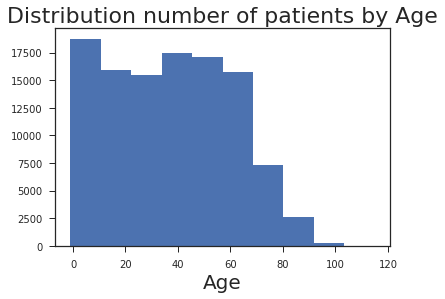

In [84]:
distribution(df['Age'], 'Age', xlabel_fontsize=20, title_fontsize=22)

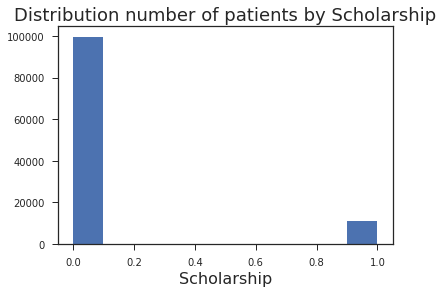

In [85]:
distribution(df['Scholarship'], 'Scholarship', xlabel_fontsize=16, title_fontsize=18)

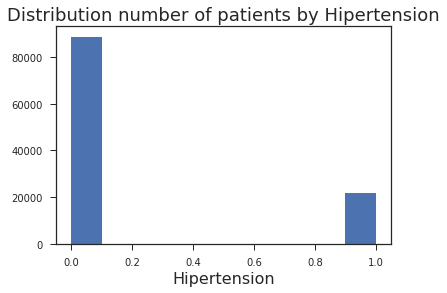

In [86]:
distribution(df['Hipertension'], 'Hipertension', xlabel_fontsize=16, title_fontsize=18)

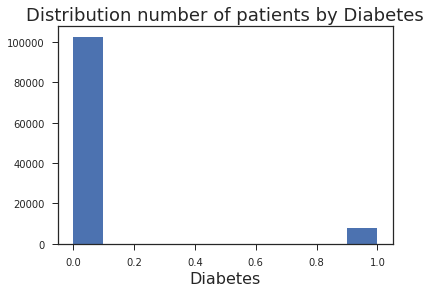

In [87]:
distribution(df['Diabetes'], 'Diabetes', xlabel_fontsize=16, title_fontsize=18)

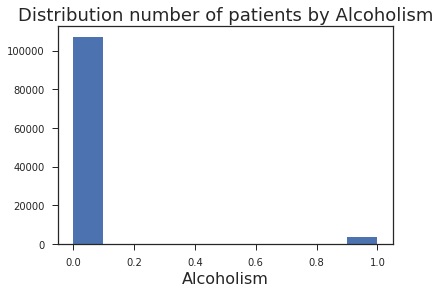

In [88]:
distribution(df['Alcoholism'], 'Alcoholism', xlabel_fontsize=16, title_fontsize=18)

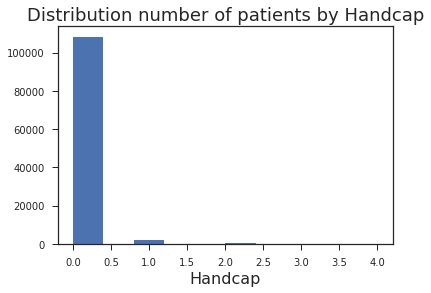

In [89]:
distribution(df['Handcap'], 'Handcap', xlabel_fontsize=16, title_fontsize=18)

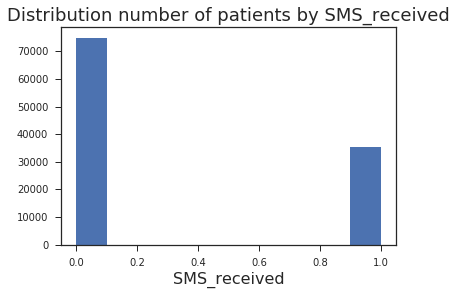

In [90]:
distribution(df['SMS_received'], 'SMS_received', xlabel_fontsize=16, title_fontsize=18)


In [91]:
df['Neighbourhood'].nunique()

81

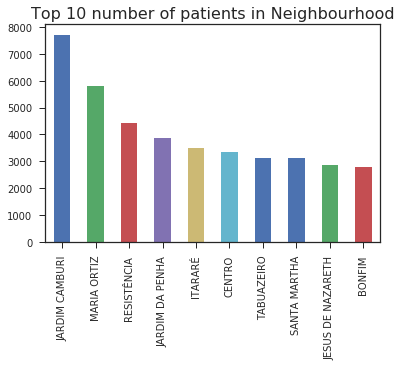

In [92]:
(df['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='bar')
plt.title('Top 10 number of patients in Neighbourhood', fontsize=16);

### Notes:
Least 25% from data are under 18 years old and with an average age of 37 years old and maximum age of 115 years old and minimum age of -1 (This is probably a mistake).
Scholarship, Hipertension, Diabetes, Alcoholism and Handcap have most of their data with a value of 0.
At least half did not receive SMS.



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [53]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
print(df['ScheduledDay'].head())
print('\n')
print(df['AppointmentDay'].head())

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object


0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object


In [54]:
testdate_raw = '2016-04-29T18:38:08Z'
testdate_converted = datetime.strptime(testdate_raw, '%Y-%m-%dT%H:%M:%SZ')
print(testdate_converted)

2016-04-29 18:38:08


In [55]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['ScheduledDay'].head())
print('\n')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
print(df['AppointmentDay'].head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


In [56]:
bool_columns=['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap', 'SMS_received', 'No-show']

# Value inspection of the columns. Iterating through the concerning columns.
for column in df[bool_columns]:
    print(df[column].value_counts())
    print('\n')


0    99666
1    10861
Name: Scholarship, dtype: int64


0    88726
1    21801
Name: Hipertension, dtype: int64


0    107167
1      3360
Name: Alcoholism, dtype: int64


0    102584
1      7943
Name: Diabetes, dtype: int64


0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


0    75045
1    35482
Name: SMS_received, dtype: int64


No     88208
Yes    22319
Name: No-show, dtype: int64




In [57]:
bool_columns.remove('Handcap')
bool_columns.remove('No-show')
print(bool_columns)


['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received']


In [58]:
for column in df[bool_columns]:
    #Conversion to boolean, by iterating through concerning colums.
    df[column] = df[column].astype('bool', inplace=True)
    
    #Check conversion took place corretly?
    print(df[column].value_counts())
    print('\n')

False    99666
True     10861
Name: Scholarship, dtype: int64


False    88726
True     21801
Name: Hipertension, dtype: int64


False    107167
True       3360
Name: Alcoholism, dtype: int64


False    102584
True       7943
Name: Diabetes, dtype: int64


False    75045
True     35482
Name: SMS_received, dtype: int64




In [59]:

df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [60]:
df['Handcap-combined'] = df['Handcap'].astype('bool')
df['Handcap-combined'].value_counts()


False    108286
True       2241
Name: Handcap-combined, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId           110527 non-null float64
AppointmentID       110527 non-null int64
Gender              110527 non-null object
ScheduledDay        110527 non-null datetime64[ns]
AppointmentDay      110527 non-null datetime64[ns]
Age                 110527 non-null int64
Neighbourhood       110527 non-null object
Scholarship         110527 non-null bool
Hipertension        110527 non-null bool
Diabetes            110527 non-null bool
Alcoholism          110527 non-null bool
Handcap             110527 non-null int64
SMS_received        110527 non-null bool
No-show             110527 non-null object
Handcap-combined    110527 non-null bool
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 8.2+ MB


In [62]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [63]:
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [64]:
df['No-show'] = df['No-show'].astype('bool', inplace=True)


In [65]:
df['No-show'].value_counts()

False    88208
True     22319
Name: No-show, dtype: int64

In [66]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [67]:
sum(df.duplicated())


635

In [68]:
df['ScheduledDay'].value_counts()

2016-05-06 07:09:54    24
2016-05-06 07:09:53    23
2016-04-25 17:18:27    22
2016-04-25 17:17:46    22
2016-04-25 17:17:23    19
2016-04-25 17:19:03    15
2016-05-31 09:54:52    15
2016-05-10 08:18:24    15
2016-06-07 16:15:14    14
2016-05-03 07:52:31    14
2016-05-25 09:36:45    13
2016-05-09 08:07:11    13
2016-05-10 08:29:24    13
2016-03-29 10:44:23    13
2016-05-13 08:54:09    12
2016-05-25 16:34:32    12
2016-05-12 13:58:44    11
2016-04-18 15:43:23    11
2016-05-13 08:38:50    11
2016-05-20 14:10:56    11
2016-03-29 10:43:41    11
2016-06-03 08:51:28    11
2016-04-18 15:39:02    11
2016-04-25 16:24:42    11
2016-05-06 08:04:41    11
2016-05-04 08:51:42    11
2016-05-20 13:06:03    11
2016-04-18 15:40:28    11
2016-05-10 17:35:47    11
2016-05-19 13:43:43    11
                       ..
2016-04-27 11:00:22     1
2016-04-27 14:40:25     1
2016-06-06 07:35:49     1
2016-04-14 09:11:44     1
2016-06-06 10:03:15     1
2016-05-03 08:36:58     1
2016-05-25 14:54:44     1
2016-06-02 0

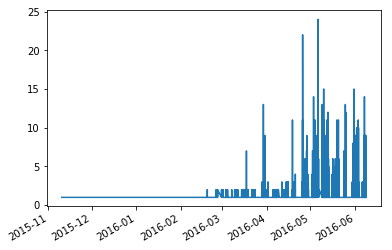

In [69]:
df['ScheduledDay'].value_counts().plot();

In [70]:
df.drop_duplicates(subset=None, keep='first', inplace=True)


In [71]:
df['ScheduledDay'].value_counts()

2016-05-06 07:09:54    23
2016-05-06 07:09:53    23
2016-04-25 17:17:46    22
2016-04-25 17:18:27    22
2016-04-25 17:17:23    19
2016-04-25 17:19:03    15
2016-05-31 09:54:52    15
2016-05-10 08:18:24    14
2016-03-29 10:44:23    13
2016-06-07 16:15:14    13
2016-05-25 09:36:45    13
2016-05-03 07:52:31    13
2016-05-09 08:07:11    13
2016-05-10 08:29:24    13
2016-05-13 08:54:09    12
2016-04-25 16:24:42    11
2016-05-25 16:34:32    11
2016-05-20 14:10:56    11
2016-06-03 08:51:28    11
2016-05-13 08:38:50    11
2016-04-18 15:40:28    11
2016-05-20 13:06:03    11
2016-04-18 15:39:02    11
2016-05-04 08:51:42    11
2016-03-29 10:43:41    11
2016-05-19 13:43:43    11
2016-04-18 15:43:23    11
2016-05-12 13:58:44    11
2016-05-06 08:04:41    11
2016-05-10 17:35:47    10
                       ..
2016-04-28 08:23:37     1
2016-05-30 14:33:14     1
2016-06-06 08:12:19     1
2016-04-18 08:57:57     1
2016-05-19 08:40:17     1
2016-05-31 10:23:13     1
2016-05-11 11:29:13     1
2016-05-24 0

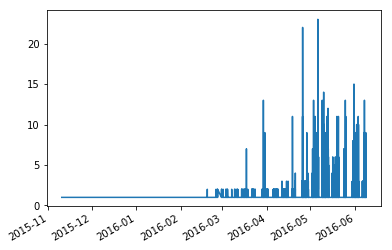

In [72]:
df['ScheduledDay'].value_counts().plot();

In [73]:
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap-combined
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,0,False,False,False


In [74]:
df.drop([99832], inplace=True)

In [75]:
df.loc[df['Age'] == 115]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Handcap-combined
63912,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,1,False,True,True
68127,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,1,False,True,True
76284,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,1,False,False,True
97666,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,0,True,False,False


In [76]:
df.to_csv('noshowappointments-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Is there a relationship between the following personal parts of information and no-shows?
1.Diseases

2.Neighbourhood

In [94]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
dfc = pd.read_csv('noshowappointments-May-2016-cleaned.csv')

#### 1. Analysis per disease

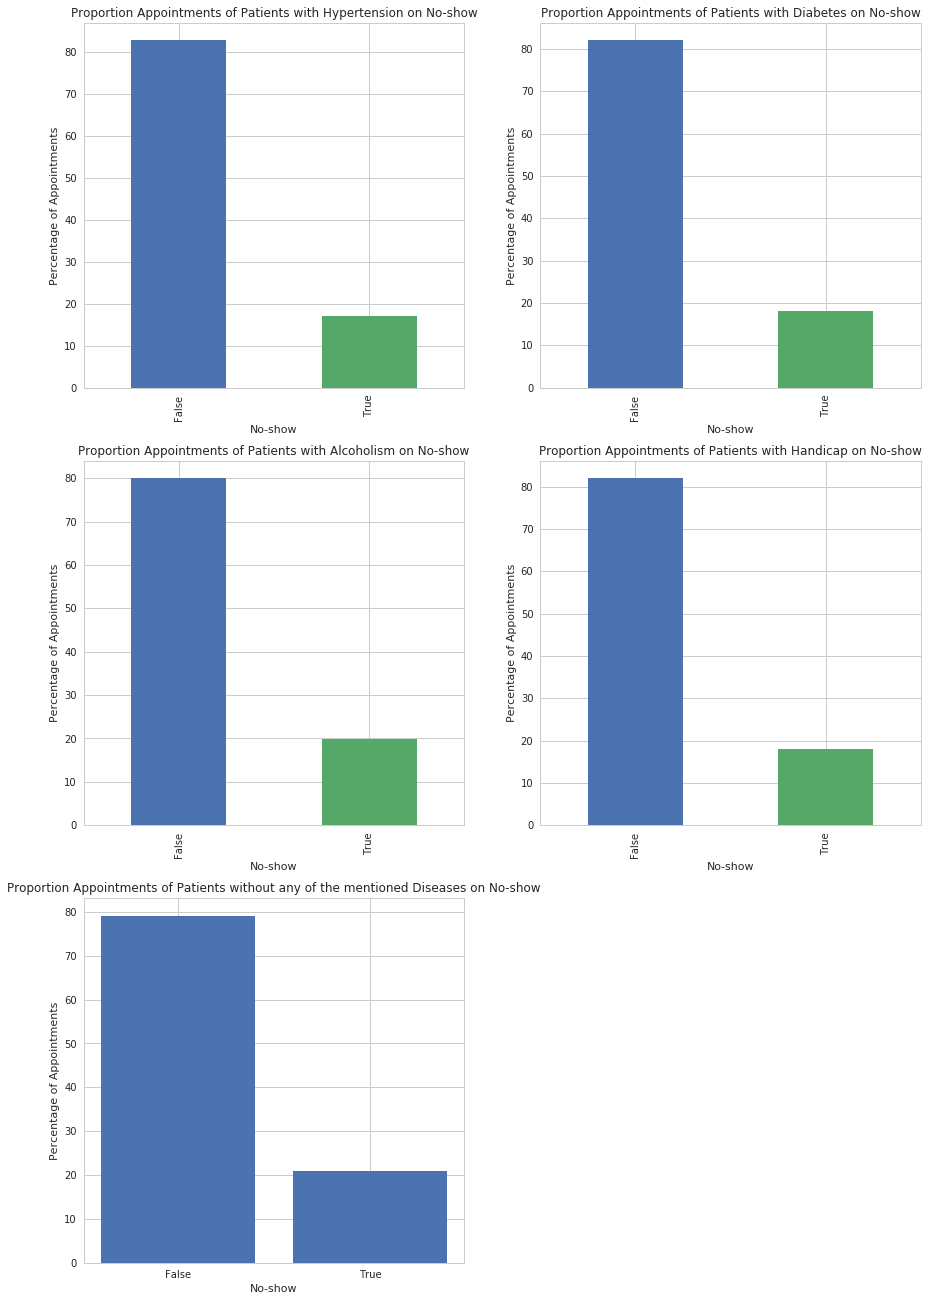

In [95]:

#For comparison, extracting patients without a stated disease into separate dataframes.
df_no_disease_showed_up = dfc[(dfc['No-show'] == False) & (dfc['Hipertension'] == False) & (dfc['Diabetes'] == False) & (dfc['Alcoholism'] == False) & (dfc['Handcap'] == False)]
df_no_disease_no_show = dfc[(dfc['No-show'] == True) & (dfc['Hipertension'] == False) & (dfc['Diabetes'] == False) & (dfc['Alcoholism'] == False) & (dfc['Handcap'] == False)]

#Calculation the total amounts of appointments per disease for proportion calculuation later on.
amount_no_disease = df_no_disease_showed_up['AppointmentDay'].count() + df_no_disease_no_show['AppointmentDay'].count()
amount_Hipertension = sum(dfc.groupby(['No-show']).sum()['Hipertension'])
amount_Diabetes = sum(dfc.groupby(['No-show']).sum()['Diabetes'])
amount_Alcoholism = sum(dfc.groupby(['No-show']).sum()['Alcoholism'])
amount_Handcap_combined = sum(dfc.groupby(['No-show']).sum()['Handcap-combined'])

#Calculation the proportions of No-show and Show-up per disease and for no-disease
hipertension = dfc.groupby(['No-show']).sum()['Hipertension']/amount_Hipertension *100
diabetes = dfc.groupby(['No-show']).sum()['Diabetes']/amount_Diabetes * 100
alcoholism = dfc.groupby(['No-show']).sum()['Alcoholism']/amount_Alcoholism * 100
handcap_combined = dfc.groupby(['No-show']).sum()['Handcap-combined']/amount_Handcap_combined * 100
no_disease_showed_up_proportion = df_no_disease_showed_up['AppointmentDay'].count() / amount_no_disease * 100
no_disease_no_show_proportion = df_no_disease_no_show['AppointmentDay'].count() / amount_no_disease * 100


#Plotting results of calculations above.
# Styling the graphs
fig = plt.figure(figsize=(15,55)) 
sns.set_style('whitegrid')

# Defining the graphs
plt.subplot(7,2,1)
hipertension.plot.bar()
plt.title('Proportion Appointments of Patients with Hypertension on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,2)
diabetes.plot.bar()
plt.title('Proportion Appointments of Patients with Diabetes on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,3)
alcoholism.plot.bar()
plt.title('Proportion Appointments of Patients with Alcoholism on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,4)
handcap_combined.plot.bar()
plt.title('Proportion Appointments of Patients with Handicap on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments')

plt.subplot(7,2,5)
plt.bar(["False","True"], [no_disease_showed_up_proportion, no_disease_no_show_proportion]);
plt.title('Proportion Appointments of Patients without any of the mentioned Diseases on No-show')
plt.xlabel('No-show')
plt.ylabel('Percentage of Appointments');


#### 2. Analysis of neighboorhood

In [96]:
dfc['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7616
MARIA ORTIZ                    5804
RESISTÊNCIA                    4387
JARDIM DA PENHA                3873
ITARARÉ                        3470
CENTRO                         3310
TABUAZEIRO                     3123
SANTA MARTHA                   3103
JESUS DE NAZARETH              2852
BONFIM                         2761
SANTO ANTÔNIO                  2733
SANTO ANDRÉ                    2556
CARATOÍRA                      2541
JABOUR                         2507
SÃO PEDRO                      2431
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2263
DA PENHA                       2203
ROMÃO                          2196
ANDORINHAS                     2194
GURIGICA                       2008
SÃO JOSÉ                       1963
BELA VISTA                     1894
MARUÍPE                        1891
ILHA DE SANTA MARIA            1885
FORTE SÃO JOÃO                 1864
SÃO CRISTÓVÃO                  1831
REDENÇÃO                    

In [97]:
hood_no_shows = dfc.groupby('Neighbourhood').sum()['No-show']


In [98]:
df_no_shows_per_hood = hood_no_shows.to_frame()
df_no_shows_per_hood.reset_index(inplace=True)
df_no_shows_per_hood.rename(columns={df_no_shows_per_hood.columns[0]: "Neighbourhood", df_no_shows_per_hood.columns[1]: "No-shows"}, inplace=True)
df_no_shows_per_hood.sort_values(ascending=False, by='No-shows', inplace=True)
df_no_shows_per_hood.head()

,Neighbourhood,No-shows
38,JARDIM CAMBURI,1429.0
43,MARIA ORTIZ,1219.0
36,ITARARÉ,902.0
59,RESISTÊNCIA,885.0
40,JESUS DE NAZARETH,695.0


In [99]:
amount_appointments_per_hood = dfc['Neighbourhood'].value_counts()
df_amount_appointments_per_hood = amount_appointments_per_hood.to_frame()
df_amount_appointments_per_hood.reset_index(inplace=True)
df_amount_appointments_per_hood.rename(columns={df_amount_appointments_per_hood.columns[0]: "Neighbourhood", df_amount_appointments_per_hood.columns[1]: "Amount_Appointments"}, inplace=True)
df_amount_appointments_per_hood.head(15)

,Neighbourhood,Amount_Appointments
0,JARDIM CAMBURI,7616
1,MARIA ORTIZ,5804
2,RESISTÊNCIA,4387
3,JARDIM DA PENHA,3873
4,ITARARÉ,3470
5,CENTRO,3310
6,TABUAZEIRO,3123
7,SANTA MARTHA,3103
8,JESUS DE NAZARETH,2852
9,BONFIM,2761


In [100]:

df_amount_appointments_per_hood = df_no_shows_per_hood.merge(df_amount_appointments_per_hood, left_on='Neighbourhood', right_on='Neighbourhood', how='inner')
df_amount_appointments_per_hood['Percentage_No_Shows'] = df_amount_appointments_per_hood['No-shows'] / df_amount_appointments_per_hood['Amount_Appointments'] * 100
df_amount_appointments_per_hood.sort_values(ascending=False, by='Amount_Appointments', inplace=True)

In [101]:
df_amount_appointments_per_hood_top_15_amount_appoint = df_amount_appointments_per_hood.head(15)
df_amount_appointments_per_hood_top_15_amount_appoint.sort_values(ascending=False, by='Percentage_No_Shows', inplace=True)
df_amount_appointments_per_hood_top_15_amount_appoint.set_index('Neighbourhood', inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


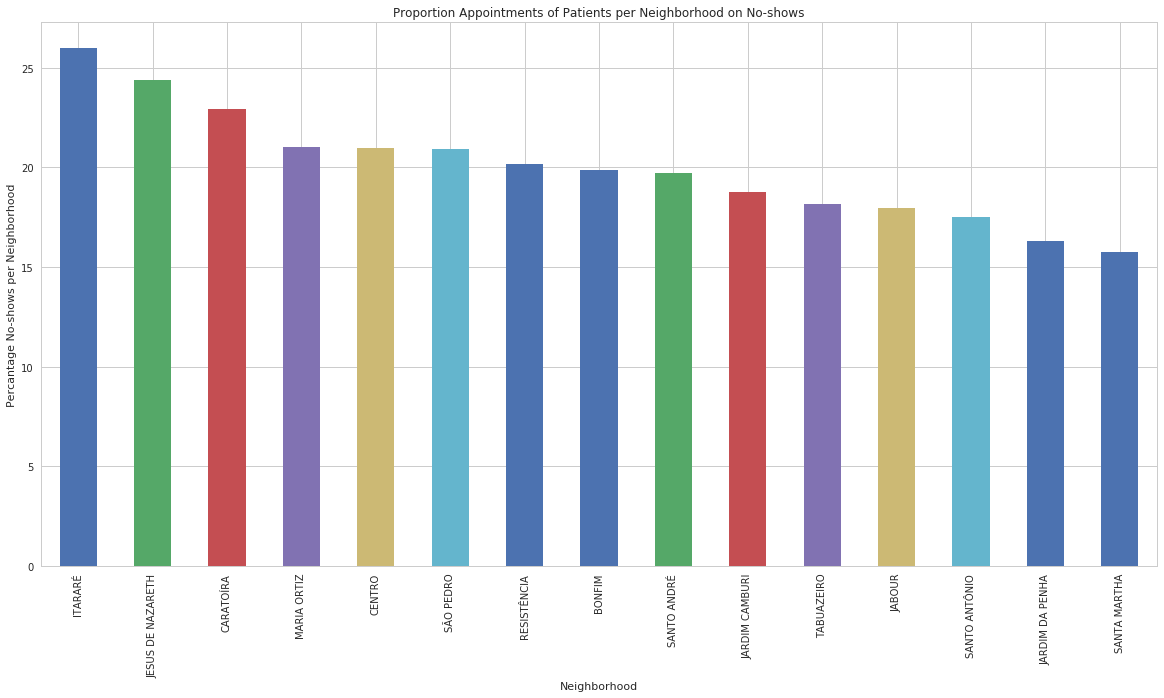

In [102]:
df_amount_appointments_per_hood_top_15_amount_appoint['Percentage_No_Shows'].plot(kind='bar', figsize=(20,10))
sns.set_style('whitegrid')
plt.title('Proportion Appointments of Patients per Neighborhood on No-shows')
plt.ylabel('Percantage No-shows per Neighborhood')
plt.xlabel('Neighborhood');

### Research Question 2: Did SMS-reminders decrease the proportion of patients not showing up?

In [103]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
dfc_sms_received = dfc[(dfc['SMS_received'] == True)]
dfc_no_sms_received = dfc[(dfc['SMS_received'] == False)]

#Grouping by No-show, to calculate the amounts for each case.
sms_received = dfc_sms_received.groupby(['No-show']).sum()['SMS_received']

# As group function in combination with boolean values only works with "True" values, we need to invert 
# the column SMS_received in this case.
dfc_no_sms_received.rename(columns={"SMS_received":"SMS_not_received"}, inplace=True)
dfc_no_sms_received['SMS_not_received'].replace({False: True}, inplace = True)                                                 

no_sms_received = dfc_no_sms_received.groupby(['No-show']).sum()['SMS_not_received']



/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [104]:
print(sms_received)
print('\n')
print(no_sms_received)
print('\n')
print(dfc['AppointmentDay'].count() == sum(sms_received) + sum(no_sms_received))

No-show
False    25698.0
True      9784.0
Name: SMS_received, dtype: float64


No-show
False    62095.0
True     12314.0
Name: SMS_not_received, dtype: float64


True


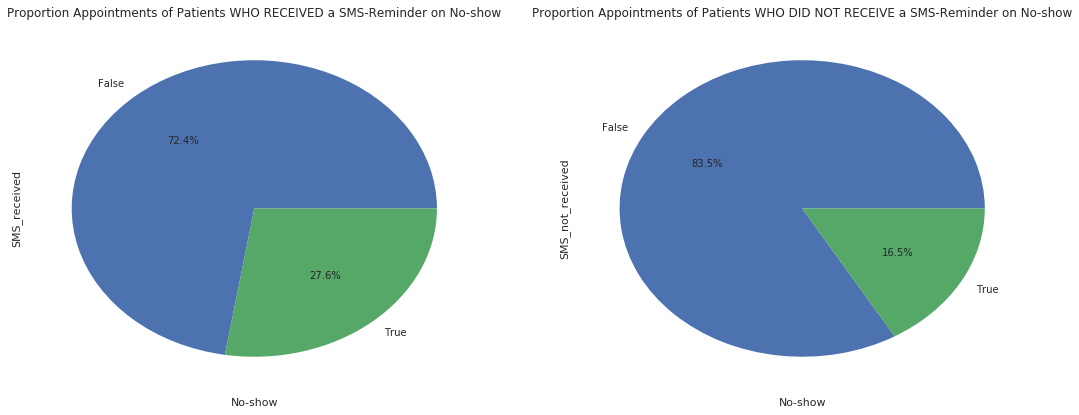

In [105]:
sms_received = sms_received / sum(sms_received) * 100
no_sms_received = no_sms_received / sum(no_sms_received) * 100

# Styling the graphs
fig = plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO RECEIVED a SMS-Reminder on No-show')
plt.xlabel('No-show')

plt.subplot(2,2,2)
no_sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO DID NOT RECEIVE a SMS-Reminder on No-show')
plt.xlabel('No-show');

<a id='conclusions'></a>
## Conclusions

My analysis revealed that patients without any of the in the dataset stated diseases have higher no-show rates compared to those having a disease. Thereby it does not make much of a difference, which disease (hypertension, diabetes, alcoholism or handicap) the patient suffers.

Furthermore, we saw large differences in no-show proportions between the neighborhoods. We have seen neighborhoods where one out of four to five appointments has a no-show.

Lastly, and most surprisingly is the fact that for the appointments within this dataset a SMS-reminding the patients of their upcoming appointment made things worse.

## Limitations
The scope of this analysis is limited to the setting in which the data has been gathered. Any findings or trends cannot be induced to a larger population or to another setting.

The analysis is limited to trends and only shows value distributions. Causations cannot be drawn. For this purpose, statistical tests and more thorough data segmentations would be required.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])